### Analise da base de dados de venda de carros, para prever se um determinado carro será ou não vendido
DecisionTree\
SVM Classifier (LinearSVC)\
DummyClassifier\
StandardScaler\

In [1]:
#instalando a biblioteca python
#!pip install graphviz==0.20

#instalando a linha de comando do graphviz (precisamos instalar isso no mac)
#!apt-get install graphviz

!apt install -y graphviz
!pip install graphviz
from graphviz import Digraph

The operation couldn’t be completed. Unable to locate a Java Runtime that supports apt.
Please visit http://www.java.com for information on installing Java.



In [2]:
import pandas as pd

In [3]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [4]:
#Renomeando as colunas, para organização e entendimento do código
a_renomear = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' : 'vendido'
}
dados = dados.rename(columns= a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [5]:
#Alterando os dados da coluna vendido de No ou Yes para 0 ou 1
a_trocar = {
    'no' : '0',
    'yes' : '1'
}
dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [6]:
#Os anos dos modelos estão com uma diferença pequena
#Criando coluna "idade do modelo""

from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,22
1,1,7843,1998,40557.96,1,24
2,2,7109,2006,89627.50,0,16
3,3,26823,2015,95276.14,0,7
4,4,7935,2014,117384.68,1,8


In [7]:
#Criando a feature de km
dados['km_por_ano'] = dados.milhas_por_ano * 160934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,22,3508522134
1,1,7843,1998,40557.96,1,24,1262205362
2,2,7109,2006,89627.50,0,16,1144079806
3,3,26823,2015,95276.14,0,7,4316732682
4,4,7935,2014,117384.68,1,8,1277011290


In [8]:
#Feature Selection (excluir colunas que não iremos usar)
#função "drop" por default excluí linhas, para dropar colunas precisamos colocar axix=1

dados = dados.drop(columns = ["Unnamed: 0", "milhas_por_ano", "ano_do_modelo"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,22,3508522134
1,40557.96,1,24,1262205362
2,89627.50,0,16,1144079806
3,95276.14,0,7,4316732682
4,117384.68,1,8,1277011290


### Modelagem com LinearSVC

In [9]:
#Separando as features da target ("vendido")
x = dados[["preco", "idade_do_modelo","km_por_ano"]]
y = dados["vendido"]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

#stratify: mantem proporçoes nas separaçoes de treino e teste feitas pelo split
#random_state (SEED): se não usar teremos valores diferentes sempre que executarmos a acurácia


x = dados[["preco", "idade_do_modelo","km_por_ano"]]
y = dados["vendido"]

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)

print("Treinaremos com  %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100

print(" A acurácia foi %.2f%%" % acuracia)

Treinaremos com  7500 elementos e testaremos com 2500 elementos
 A acurácia foi 58.00%


/Users/thaismarcondes/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### Criando baseline, para comparação de acurácia do modelo

Dummy classifiers e svc

In [11]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
previsoes = dummy.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) *100
print("Acurácia do dummy foi %.2f%%" % acuracia)

Acurácia do dummy foi 58.00%


In [12]:
#Usando o dummy Stratified

from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy = 'stratified')
dummy_stratified.fit(treino_x, treino_y)
previsoes = dummy_stratified.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) *100
print ("A acurácia do dummy stratified foi %.2f%%" % acuracia)

A acurácia do dummy stratified foi 52.44%


In [13]:
#Usando dummy Most frequent

dummy_mostfrequent = DummyClassifier(strategy = "most_frequent")
dummy_mostfrequent.fit(treino_x, treino_y)
previsoes = dummy_mostfrequent.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) *100
print("A acurácia do dummy mostfrequent foi %.2f%%" % acuracia)

A acurácia do dummy mostfrequent foi 58.00%


In [14]:
#Utilizando a acurácia no próprio dummy
dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print("A acurácia do dummy stratified foi %.2f%%" % acuracia)

A acurácia do dummy stratified foi 58.00%


### Modelagem com SVC e StandartScaller

In [15]:
#StandartScaller tira a média dos dados e divide pelo desvio padrão
#ou seja, limita o espaço onde os dados irão existir

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size =0.25,
                                                               stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo= SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100

print("A acurácia foi %.2f%%" % acuracia)

'''
Com esse resultado, tivemos em ganho muito grande de acurácia 
em relação à baseline - aproximadamente 25% de ganho absoluto e 48% de ganho relativo.

SVC não mostra as regras de decisão que estão sendo tomadas (black-box)

'''


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


'\nCom esse resultado, tivemos em ganho muito grande de acurácia \nem relação à baseline - aproximadamente 25% de ganho absoluto e 48% de ganho relativo.\n\nSVC não mostra as regras de decisão que estão sendo tomadas (black-box)\n\n'

### Classificação com a Decision Tree 

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size =0.25,
                                                               stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo= DecisionTreeClassifier()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100

print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 73.20%


In [1]:
'''
#importando biblioteca de visualização da árvore
from sklearn.tree import export_graphviz
import graphviz
from graphviz import Digraph

#devolve o formato de um gráfico
dot_data= export_graphviz(modelo, out_file=None)

#importando gráfico usando como fonte o dot_data
grafico = graphviz.Source(dot_data)
grafico
'''

'\n#importando biblioteca de visualização da árvore\nfrom sklearn.tree import export_graphviz\nimport graphviz\nfrom graphviz import Digraph\n\n#devolve o formato de um gráfico\ndot_data= export_graphviz(modelo, out_file=None)\n\n#importando gráfico usando como fonte o dot_data\ngrafico = graphviz.Source(dot_data)\ngrafico\n'

In [18]:
#Aguardando retorno do suporte alura para instalar linha de comando graphviz

[Text(149.4076789333905, 215.53263157894736, 'X[0] <= -0.196\ngini = 0.487\nsamples = 7500\nvalue = [3150, 4350]'),
 Text(38.67094650446909, 211.7178947368421, 'X[0] <= -0.986\ngini = 0.202\nsamples = 3248\nvalue = [370, 2878]'),
 Text(38.31498172142905, 207.90315789473684, 'gini = 0.0\nsamples = 1441\nvalue = [0, 1441]'),
 Text(39.02691128750913, 207.90315789473684, 'X[0] <= -0.96\ngini = 0.326\nsamples = 1807\nvalue = [370, 1437]'),
 Text(4.093595004960465, 204.0884210526316, 'X[0] <= -0.963\ngini = 0.441\nsamples = 61\nvalue = [20, 41]'),
 Text(3.025700655840343, 200.2736842105263, 'X[1] <= 0.989\ngini = 0.397\nsamples = 55\nvalue = [15, 40]'),
 Text(1.957806306720222, 196.45894736842104, 'X[0] <= -0.985\ngini = 0.346\nsamples = 45\nvalue = [10, 35]'),
 Text(1.6018415236801817, 192.6442105263158, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(2.3137710897602624, 192.6442105263158, 'X[0] <= -0.982\ngini = 0.325\nsamples = 44\nvalue = [9, 35]'),
 Text(1.957806306720222, 188.8294736

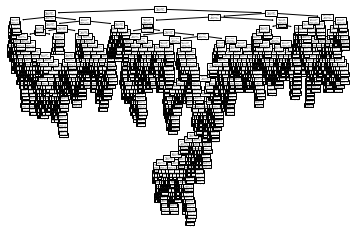

In [29]:
from sklearn.tree import plot_tree
plot_arvore = plot_tree(modelo,max_depth=None, feature_names=None,
               class_names=None, label='all', filled=False, 
               impurity=True, node_ids=False, proportion=False, 
               rounded=False, precision=3, ax=None, fontsize=None)
plot_arvore

In [2]:
'''
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import tree

fig = plt.figure(figsize=(100,120))
_=tree.plot_tree(plot_arvore,
                feature_names=None,
                class_names=['0', '1'],
                filled=True)
plt.show()
'''

"\nfrom matplotlib import pyplot as plt\n%matplotlib inline\n\nfrom sklearn import tree\n\nfig = plt.figure(figsize=(100,120))\n_=tree.plot_tree(plot_arvore,\n                feature_names=None,\n                class_names=['0', '1'],\n                filled=True)\nplt.show()\n"

In [34]:
#tree.plot_tree(plot_arvore)

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

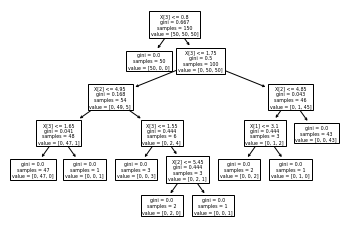

In [35]:
#Teste plotagem com Iris
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
tree.plot_tree(clf)